# Análisis de comentarios

In [88]:
import pandas as pd
import seaborn as sns
import re
from unidecode import unidecode
from nltk.corpus import stopwords
import nltk

In [89]:
df = pd.read_csv('data/feedback_clean.csv')
df

,location,comment,rating,feedback_date
0,Mall,Loved the croissant,4,2024-03-09
1,University District,Great service!,4,2024-02-19
2,Downtown,Line was too long,5,2024-04-23
3,University District,Not impressed,5,2024-04-24
4,Financial District,Wifi was slow,5,2024-01-13
...,...,...,...,...
2995,Mall,Very clean,3,2024-02-13
2996,Suburbs,Not impressed,4,2024-03-02
2997,Financial District,Very clean,3,2024-04-16
2998,Mall,Coffee was cold,5,2024-01-13


In [90]:
# Cambiando a tipo datetime
df['feedback_date'] = pd.to_datetime(df['feedback_date'])
df['feedback_date'].dtype

dtype('<M8[ns]')

## Análisis General del Rating

In [91]:
# Ver la calificación promedio de cada sucursal
df.groupby('location')['rating'].mean().round(2)

location
Downtown               3.69
Financial District     3.66
Mall                   3.64
Suburbs                3.73
University District    3.68
Name: rating, dtype: float64

In [92]:
# Ver la información general de calificación del café
df['rating'].describe().round(2)

count    3000.00
mean        3.68
std         1.10
min         1.00
25%         3.00
50%         4.00
75%         4.00
max         5.00
Name: rating, dtype: float64

<Axes: xlabel='rating', ylabel='Count'>

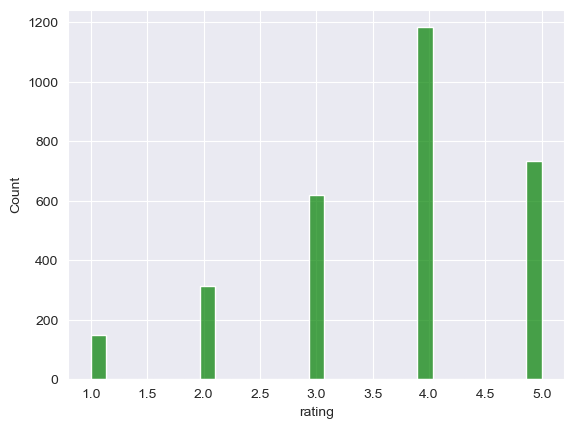

In [93]:
# Ver de forma gráfica la cantidad de reseñas
sns.histplot(data=df, x='rating', line_kws={'color': 'green'}, color='green', alpha=.7)

In [94]:
# Vemos la cantidad estrellas que la gente ha puesto en el rating
df_ratings = df['rating'].value_counts(sort=False)
df_ratings = df_ratings.reset_index()
df_ratings

,rating,count
0,4,1183
1,5,735
2,3,619
3,2,315
4,1,148


In [95]:
# Aquí vemos su porcentaje
df_ratings['%'] = round(df_ratings['count'] / df_ratings['count'].sum() * 100, 2)
df_ratings

,rating,count,%
0,4,1183,39.43
1,5,735,24.50
2,3,619,20.63
3,2,315,10.50
4,1,148,4.93


## Arreglando la columna comment para el feedback

In [96]:
# Descargando las stopwords
nltk.download('stopwords')

# Stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leon_07/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
# Función de limpieza
def cleaning_feedback(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove accents
    text = unidecode(text)
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    words = text.split()
    clean_words = [word for word in words if word not in stop_words]
    return ' '.join(clean_words)

In [98]:
# Apply the cleaning function and overwrite the 'clean_comment' column
df['clean_comment'] = df['comment'].apply(lambda x: cleaning_feedback(x) if isinstance(x, str) else x)

In [99]:
df['clean_comment'].head()

0    loved croissant
1      great service
2          line long
3          impressed
4          wifi slow
Name: clean_comment, dtype: object

In [100]:
df['clean_comment'] = df['clean_comment'].str.split()

In [101]:
df

,location,comment,rating,feedback_date,clean_comment
0,Mall,Loved the croissant,4,2024-03-09,"[loved, croissant]"
1,University District,Great service!,4,2024-02-19,"[great, service]"
2,Downtown,Line was too long,5,2024-04-23,"[line, long]"
3,University District,Not impressed,5,2024-04-24,[impressed]
4,Financial District,Wifi was slow,5,2024-01-13,"[wifi, slow]"
...,...,...,...,...,...
2995,Mall,Very clean,3,2024-02-13,[clean]
2996,Suburbs,Not impressed,4,2024-03-02,[impressed]
2997,Financial District,Very clean,3,2024-04-16,[clean]
2998,Mall,Coffee was cold,5,2024-01-13,"[coffee, cold]"


## Detectar palabras clave por rating

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
def get_key_words_per_range(data, rango):
    comments = data[data['rating'] == rango]['clean_comment']

    # Convert lists back to strings for CountVectorizer
    comments = comments.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(comments)

    words_sum = X.sum(axis=0)
    freq_words = [(word, words_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    freq_words = sorted(freq_words, key=lambda x: x[1], reverse=True)

    return freq_words[:10]

In [104]:
# Vemos las palabras clave del rating 1
get_key_words_per_range(df, 1)

[('coffee', np.int64(17)),
 ('noisy', np.int64(14)),
 ('excellent', np.int64(14)),
 ('staff', np.int64(14)),
 ('clean', np.int64(14)),
 ('tasty', np.int64(12)),
 ('food', np.int64(12)),
 ('wifi', np.int64(12)),
 ('slow', np.int64(12)),
 ('friendly', np.int64(12))]

In [105]:
# Vemos las palabras clave del rating 2
get_key_words_per_range(df, 2)

[('coffee', np.int64(46)),
 ('line', np.int64(35)),
 ('long', np.int64(35)),
 ('noisy', np.int64(26)),
 ('clean', np.int64(23)),
 ('cold', np.int64(23)),
 ('best', np.int64(23)),
 ('bad', np.int64(23)),
 ('experience', np.int64(23)),
 ('great', np.int64(22))]

In [106]:
# Vemos las palabras clave del rating 3
get_key_words_per_range(df, 3)

[('coffee', np.int64(86)),
 ('friendly', np.int64(53)),
 ('barista', np.int64(53)),
 ('great', np.int64(48)),
 ('service', np.int64(48)),
 ('clean', np.int64(47)),
 ('cold', np.int64(45)),
 ('noisy', np.int64(45)),
 ('excellent', np.int64(43)),
 ('staff', np.int64(43))]

In [107]:
# Vemos las palabras clave del rating 4
get_key_words_per_range(df, 4)

[('coffee', np.int64(147)),
 ('impressed', np.int64(105)),
 ('tasty', np.int64(87)),
 ('food', np.int64(87)),
 ('clean', np.int64(87)),
 ('loved', np.int64(85)),
 ('croissant', np.int64(85)),
 ('excellent', np.int64(84)),
 ('staff', np.int64(84)),
 ('line', np.int64(82))]

In [108]:
# Vemos las palabras clave del rating 5
get_key_words_per_range(df, 5)

[('coffee', np.int64(106)),
 ('clean', np.int64(61)),
 ('cold', np.int64(59)),
 ('noisy', np.int64(55)),
 ('come', np.int64(54)),
 ('wifi', np.int64(51)),
 ('slow', np.int64(51)),
 ('tasty', np.int64(50)),
 ('food', np.int64(50)),
 ('bad', np.int64(50))]